In [4]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries import converter
converter.register()
%matplotlib inline

/Users/wguo017/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  


#### Retrieve the data series

In [2]:
fred = Fred(api_key='3ef5e8085a573dfe7fa42c315d48c69e')
chauvet = fred.get_series('RECPROUSM156N')
nber_date = fred.get_series('USRECD')
hamilton = fred.get_series('JHGDPBRINDX')
sahm_real = fred.get_series('SAHMREALTIME')

/Users/wguo017/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


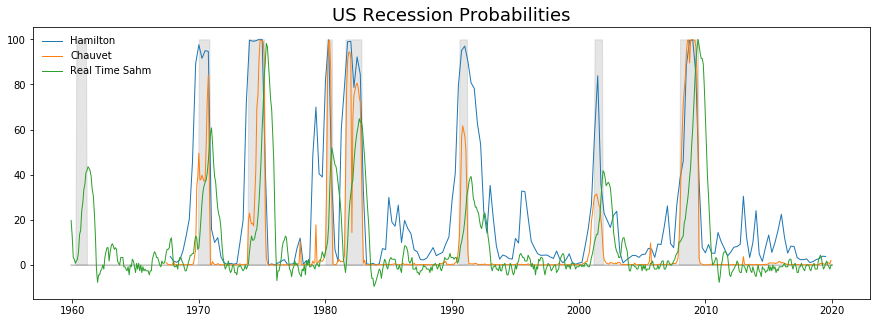

In [3]:
df=pd.DataFrame(data=sahm_real.values, index=sahm_real.index, columns=['sahm_real'])
for x in ['nber_date', 'hamilton', 'chauvet']:
    data = pd.DataFrame(data=globals()[x].values, index=globals()[x].index, columns=[x])
    df=df.join(data, how='left')

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(sahm_real.index, np.zeros(sahm_real.size), color='black', alpha=0.2)
plt.fill_between(df.index, df['nber_date'].values*100, color='grey', alpha=0.2)
ax.plot(hamilton.index,hamilton.values, label='Hamilton', alpha=1, linewidth=1)
ax.plot(chauvet.index,chauvet.values, label='Chauvet', alpha=1, linewidth=1)
ax.plot(sahm_real.index,sahm_real.values/sahm_real.values.max()*100, label='Real Time Sahm', alpha=1, linewidth=1)
ax.set_title('US Recession Probabilities', fontsize=18)
ax.legend(loc='upper left', frameon=False)